In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from Dynamic_Model import *
from MotorModel import *
from update_robot_coordinates import *
from local_to_global_coordinates import *
from coppeliasim_model import *
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Criação de objetos

In [76]:
MM = MotorModel()
DM = Dynamic_Model()

# Inicialização

In [101]:
steps = 150
delta_t = 0.05000000074505806

x = -2.000
y = -2.000
theta = 0

x_r = 0
y_r = 0
theta_r = 0

voltage_right = 500
voltage_left  = 500
angular_velocity_right = 0
angular_velocity_left  = 0

# Simulação

In [102]:
angular_velocity_right_list = np.zeros(steps)
angular_velocity_left_list  = np.zeros(steps)
x_r_list     = np.zeros(steps)
y_r_list     = np.zeros(steps)
theta_r_list = np.zeros(steps)
x_list = np.zeros(steps)
y_list = np.zeros(steps)
theta_list = np.zeros(steps)
for i in range(steps):
    angular_velocity_right_list[i] = angular_velocity_right
    angular_velocity_left_list[i] = angular_velocity_left
    x_r_list[i] = x_r
    y_r_list[i] = y_r
    theta_r_list[i] = theta_r
    x_list[i] = x/100 #Conversão para metros
    y_list[i] = y/100
    theta_list[i] = theta
    torque_right, torque_left = MM.step(voltage_right, voltage_left, angular_velocity_right, angular_velocity_left, i)
    angular_velocity_right, angular_velocity_left = DM.step(torque_right, torque_left)
    x_r, y_r, theta_r = update_robot_coordinates(x_r, y_r, theta_r, angular_velocity_right, angular_velocity_left, DM.R, DM.L*2, delta_t)
    x, y, theta = local_to_global_coordinates(x_r, y_r, x, y, theta_r)


In [103]:
df = coppeliasim_model(angular_velocity_right_list, angular_velocity_left_list)

Starting simpleTest.py ...


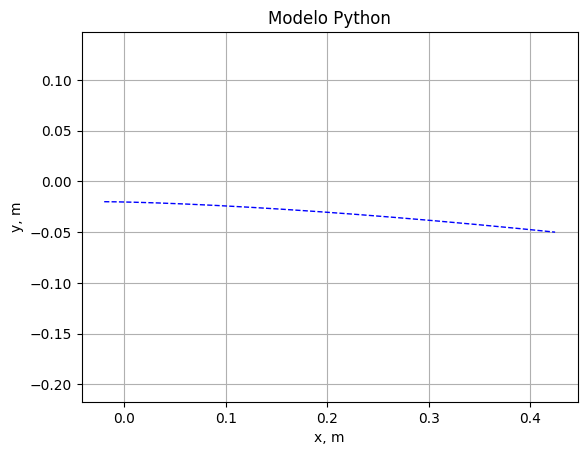

In [106]:
fig,ax=plt.subplots()
ax.axis('equal')
ax.plot(x_list, y_list, color='blue',linestyle='dashed',linewidth=1)
plt.grid()
plt.title("Modelo Python")
plt.xlabel("x, m")
plt.ylabel("y, m")
plt.show(block=False)

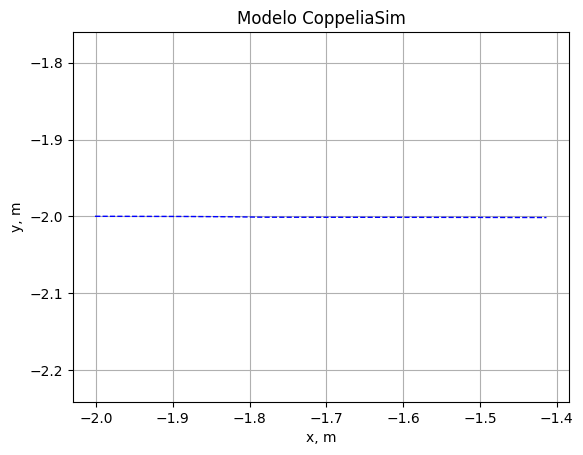

In [107]:
fig,ax=plt.subplots()
ax.axis('equal')
ax.plot(df['xp'], df['yp'], color='blue',linestyle='dashed',linewidth=1)
plt.grid()
plt.title("Modelo CoppeliaSim")
plt.xlabel("x, m")
plt.ylabel("y, m")
plt.show(block=False)


In [108]:
def evaluation(test, predicted):
    # Calculating and printing the MAE score
    mae = mean_absolute_error(test, predicted)
    print("Mean Absolute Error:", round(mae, 2))

    # Calculating and printing the MSE score
    mse = mean_squared_error(test, predicted)
    print("Mean Squared Error:", round(mse, 2))

In [109]:
# Avaliação eixo X
evaluation(df['xp'], x_list)



Mean Absolute Error: 1.84
Mean Squared Error: 3.38


In [110]:
evaluation(df['yp'], y_list)


Mean Absolute Error: 1.97
Mean Squared Error: 3.89
